In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import pandas as pd
import numpy as np
pd.options.display.max_columns=50

import sklearn
from sklearn.linear_model import Lasso, Ridge
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# 필요한 패키지와 라이브러리를 가져옴
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
path = 'C:\\Users\\JuhoSon\\AppData\\Local\\Microsoft\\Windows\\Fonts\\NanumGothicCoding-Bold.ttf'
font_name = fm.FontProperties(fname=path, size=50).get_name()
plt.rc('font', family=font_name)

# Data Load

In [4]:
df_20 = pd.read_csv('./data/innovation/create/df_age50.csv')

In [5]:
df_20.shape

(365, 38)

In [6]:
df_20.head()

,age50숙박,age50레저용품,age50레저업소,age50문화취미,age50가구,age50전기,age50주방,age50연료,age50광학,age50가전,age50유통업,age50의복,age50직물,age50신변잡화,age50서적문구,age50사무통신,age50자동차판매,age50자동차정비,age50의료기관,age50보건위생,age50요식업소,age50음료식품,age50수리서비스,age50,LCLS_10_P,LCLS_20_P,LCLS_30_P,LCLS_40_P,LCLS_50_P,LCLS_60_P,LCLS_70_P,LCLS_80_P,pm10,pm25,CONTENT,temp,humi,강수량(mm)
0,NaN,206.0,1204.0,388.0,25.0,NaN,12.0,2085.0,8.0,64.0,28978.0,437.0,12.0,72.0,760.0,NaN,NaN,58.0,978.0,1877.0,14351.0,2763.0,99.0,326373.41,5.775959e+06,4.653959e+06,7.123695e+06,460575.529718,8.889679e+05,102938.908335,158304.695151,125768.139866,68.127083,35.221528,515,16.580764,56.770833,0.0
1,39.0,131.0,643.0,210.0,NaN,NaN,25.0,2265.0,46.0,140.0,26613.0,513.0,12.0,140.0,687.0,43.0,NaN,264.0,8666.0,1307.0,13421.0,3256.0,337.0,369821.56,5.798567e+06,4.068040e+06,6.922594e+06,517274.801816,7.320147e+05,85751.772442,189721.667844,159773.285544,71.924306,29.909028,888,19.631111,57.827083,0.0
2,42.0,119.0,771.0,173.0,13.0,NaN,37.0,2106.0,50.0,72.0,26966.0,546.0,12.0,107.0,669.0,25.0,NaN,241.0,7405.0,1381.0,13933.0,3392.0,276.0,384986.42,5.882238e+06,4.045719e+06,6.679634e+06,396954.848039,6.941187e+05,109181.181977,146743.364491,83460.961960,72.979861,24.331944,856,19.192500,61.674306,0.1
3,35.0,115.0,751.0,225.0,NaN,13.0,29.0,2103.0,49.0,101.0,28748.0,396.0,24.0,107.0,659.0,NaN,NaN,198.0,6935.0,1335.0,14271.0,3537.0,347.0,377589.84,6.163598e+06,4.284199e+06,6.238373e+06,400734.630537,9.144325e+05,106260.195832,133827.487702,85526.543799,18.221528,10.952778,893,14.075417,60.129861,18.5
4,51.0,81.0,719.0,183.0,20.0,17.0,NaN,2023.0,25.0,104.0,24812.0,243.0,12.0,76.0,549.0,29.0,NaN,149.0,6381.0,1278.0,13619.0,3470.0,140.0,361374.41,6.131853e+06,3.723724e+06,5.135552e+06,430144.414585,1.099378e+06,120809.906702,149481.681510,89173.629481,8.854861,3.891667,864,8.620000,77.163194,10.5


Text(0.5, 0, '업종')

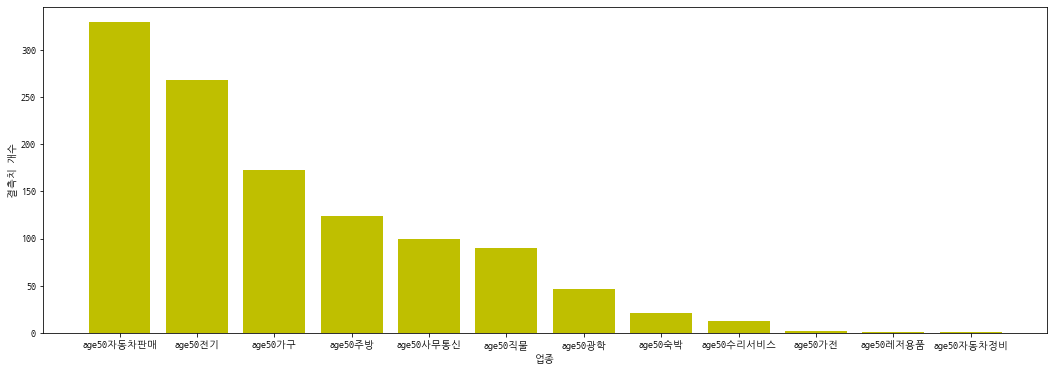

In [7]:
df_null = pd.DataFrame(df_20.isnull().sum()).rename(columns={0:'null'})

df_null.reset_index(inplace=True)

drop_idx = np.where(df_null.null==0)[0]
df_null.drop(drop_idx, inplace=True)

df_null = df_null.sort_values(by='null', ascending=False).set_index('index')

plt.figure(figsize=(18,6))
plt.bar(df_null.index, df_null.null, color='y')
plt.xticks(df_null.index)
plt.ylabel('결측치 개수')
plt.xlabel('업종')

In [7]:
df_20.isnull().sum()

age50숙박        21
age50레저용품       1
age50레저업소       0
age50문화취미       0
age50가구       173
age50전기       268
age50주방       124
age50연료         0
age50광학        47
age50가전         2
age50유통업        0
age50의복         0
age50직물        90
age50신변잡화       0
age50서적문구       0
age50사무통신      99
age50자동차판매    329
age50자동차정비      1
age50의료기관       0
age50보건위생       0
age50요식업소       0
age50음료식품       0
age50수리서비스     13
age50           0
LCLS_10_P       0
LCLS_20_P       0
LCLS_30_P       0
LCLS_40_P       0
LCLS_50_P       0
LCLS_60_P       0
LCLS_70_P       0
LCLS_80_P       0
pm10            0
pm25            0
CONTENT         0
temp            0
humi            0
강수량(mm)         0
dtype: int64

In [8]:
print('age50 null columns : ', ['가구', '전기', '주방', '광학', '가전', '직물', '사무통신', '자동차판매', '자동차정비', '수리서비스', '숙박', '레저용품'])

age50 null columns :  ['가구', '전기', '주방', '광학', '가전', '직물', '사무통신', '자동차판매', '자동차정비', '수리서비스', '숙박', '레저용품']


In [9]:
df_20.drop(['age50가구', 'age50전기', 'age50주방', 
           'age50광학', 'age50가전', 'age50직물', 
           'age50사무통신', 'age50자동차판매', 'age50자동차정비',
           
           'age50수리서비스', 'age50숙박', 'age50레저용품'], axis=1, inplace=True)

In [10]:
df_20  = df_20.rename(columns={'강수량(mm)':'prec'})

In [11]:
df_20.columns = ['레저업소', '문화취미', '연료', '유통업',
       '의복', '신변잡화', '서적문구', '의료기관', '보건위생',
       '요식업소', '음료식품', 'pop', 'LCLS_10_P',
       'LCLS_20_P', 'LCLS_30_P', 'LCLS_40_P', 'LCLS_50_P', 'LCLS_60_P',
       'LCLS_70_P', 'LCLS_80_P', 'pm10', 'pm25', 'CONTENT', 'temp', 'humi',
       'prec']

# Two_way Anova (F)

In [14]:
import scipy.stats as stats
import pandas as pd
import urllib
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [27]:
# good_idx = np.where(df_20.pm10<=50)[0]

# bad_idx = np.where(df_20.pm10>50)[0]

# df_20['pm10_category']=[0]*len(df_20)

In [11]:
# for i in range(len(df_20)):
#     if i in good_idx:
#         df_20['pm10_category'].iloc[i] = 'good'
# #     elif i in middle_idx:
# #         df_20['pm10_category'].iloc[i] = 'middle'
#     else:
#         df_20['pm10_category'].iloc[i] = 'bad'

In [12]:
# good_idx_25 = np.where(df_20.pm25<=25)[0]

# bad_idx_25 = np.where(df_20.pm25>25)[0]

# df_20['pm25_category']=[0]*len(df_20)

In [13]:
# for i in range(len(df_20)):
#     if i in good_idx:
#         df_20['pm25_category'].iloc[i] = 'good'
# #     elif i in middle_idx:
# #         df_20['pm10_category'].iloc[i] = 'middle'
#     else:
#         df_20['pm25_category'].iloc[i] = 'bad'

In [14]:
# good_idx_temp = np.where(df_20.temp<=35)[0]

# bad_idx_temp = np.where(df_20.temp>35)[0]

# df_20['temp_category']=[0]*len(df_20)

In [15]:
# for i in range(len(df_20)):
#     if i in good_idx:
#         df_20['temp_category'].iloc[i] = 'bad'
# #     elif i in middle_idx:
# #         df_20['pm10_category'].iloc[i] = 'middle'
#     else:
#         df_20['temp_category'].iloc[i] = 'good'

In [16]:
# df_anova = df_20[['age20숙박_USE_AMT', 'pm10', 'pm25', 'temp']]

* anova function

In [46]:
formula = '숙박 ~ pm10 + pm25 + CONTENT + temp + humi + prec + pm10:temp + pm10:prec + pm25:temp + pm25:prec'
# :뒤로넣으면 서로 겹치는 변수를 고려해서 반영해주는것.
lm = ols(formula, df_20).fit()

PatsyError: Error evaluating factor: NameError: name '숙박' is not defined
    숙박 ~ pm10 + pm25 + CONTENT + temp + humi + prec + pm10:temp + pm10:prec + pm25:temp + pm25:prec
    ^^

In [102]:
anova_lm(lm)

,df,sum_sq,mean_sq,F,PR(>F)
pm10,1.0,7.507348e+04,75073.479325,4.968606,0.026437
pm25,1.0,3.745534e+04,37455.337109,2.478915,0.116273
temp,1.0,1.757853e+04,17578.528367,1.163404,0.281493
humi,1.0,1.467224e+04,14672.243167,0.971056,0.325088
prec,1.0,6.108905e+02,610.890518,0.040431,0.840756
pm10:temp,1.0,1.911251e+04,19112.513535,1.264928,0.261480
pm10:prec,1.0,5.420094e+00,5.420094,0.000359,0.984900
pm25:temp,1.0,2.306983e+03,2306.982800,0.152684,0.696218
pm25:prec,1.0,2.999732e+03,2999.732331,0.198532,0.656180
Residual,355.0,5.363896e+06,15109.567143,NaN,NaN


In [70]:
def anova(col_name):
    formula = col_name + ' ~ pm10 + pm25 + temp + humi + CONTENT + prec + CONTENT:temp + CONTENT:prec + CONTENT:humi'
    lm = ols(formula, df_20).fit()
    return anova_lm(lm), lm.summary()

In [48]:
def coef_bar(colname):
    X = df_20.drop(colname, axis=1)
    Y = df_20[colname]

    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=42)
    ridge = Ridge(fit_intercept=True,
    #               alpha=0.5
                 )
    # solver : svd, 초코피? 는 NE바로안될떄 적용하고, 뒤에 4개는 SGD에 사용
    ridge.fit(X_train,y_train)
    # lasso.fit(X_train, y_train)

    # set_df
    df_sukbak = pd.DataFrame(ridge.coef_, df_20.drop(colname,axis=1).columns).rename(columns={0:'coef'})
    df_sukbak = df_sukbak.sort_values(by='coef', ascending=False)

    # bar
    plt.figure(figsize=(12, 6))
    plt.barh(df_sukbak.index, df_sukbak['coef'])
    # plt.xticks(df_sukbak['coef'])
    return None

# Check Coef

In [17]:
from sklearn.linear_model import Lasso, Ridge

In [18]:
from sklearn.model_selection import train_test_split

## 숙박 10

In [19]:
# anova("숙박")

In [20]:
# coef_bar('숙박')

## 레저용품 20

In [21]:
# anova("레저용품")

In [22]:
# coef_bar('레저용품')

## 문화취미 22

In [71]:
anova("문화취미")

(                 df        sum_sq       mean_sq          F        PR(>F)
 pm10            1.0  4.728444e+04  4.728444e+04   2.607102  1.072744e-01
 pm25            1.0  1.611619e+04  1.611619e+04   0.888592  3.465003e-01
 temp            1.0  4.389667e+03  4.389667e+03   0.242031  6.230470e-01
 humi            1.0  2.676011e+05  2.676011e+05  14.754608  1.450074e-04
 CONTENT         1.0  1.662313e+06  1.662313e+06  91.654232  1.825737e-19
 prec            1.0  7.694543e+03  7.694543e+03   0.424251  5.152450e-01
 CONTENT:temp    1.0  4.260249e+05  4.260249e+05  23.489557  1.880662e-06
 CONTENT:prec    1.0  2.961682e+02  2.961682e+02   0.016330  8.983893e-01
 CONTENT:humi    1.0  9.654655e+02  9.654655e+02   0.053232  8.176640e-01
 Residual      355.0  6.438557e+06  1.813678e+04        NaN           NaN,
 <class 'statsmodels.iolib.summary.Summary'>
 """
                             OLS Regression Results                            
 Dep. Variable:                   문화취미   R-squared:    

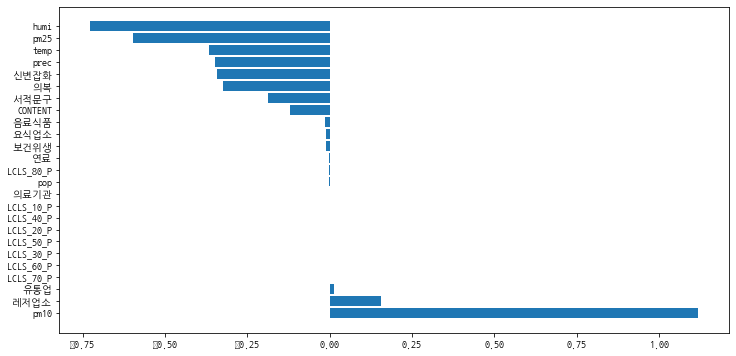

In [72]:
coef_bar('문화취미')

# 가구 30 Null로 삭제

## 전기 31 Null로 삭제

## 주방용구 32 Null로 삭제

## 유통업 40

In [73]:
anova("유통업")

(                 df        sum_sq       mean_sq          F        PR(>F)
 pm10            1.0  5.489628e+07  5.489628e+07  10.887269  1.066385e-03
 pm25            1.0  4.777820e+05  4.777820e+05   0.094756  7.583965e-01
 temp            1.0  3.928635e+08  3.928635e+08  77.914396  4.985489e-17
 humi            1.0  9.853177e+07  9.853177e+07  19.541250  1.310119e-05
 CONTENT         1.0  6.939295e+07  6.939295e+07  13.762312  2.406953e-04
 prec            1.0  6.064986e+07  6.064986e+07  12.028346  5.883577e-04
 CONTENT:temp    1.0  6.871209e+06  6.871209e+06   1.362728  2.438487e-01
 CONTENT:prec    1.0  6.671921e+06  6.671921e+06   1.323204  2.507920e-01
 CONTENT:humi    1.0  1.439132e+07  1.439132e+07   2.854150  9.201637e-02
 Residual      355.0  1.789997e+09  5.042245e+06        NaN           NaN,
 <class 'statsmodels.iolib.summary.Summary'>
 """
                             OLS Regression Results                            
 Dep. Variable:                    유통업   R-squared:    

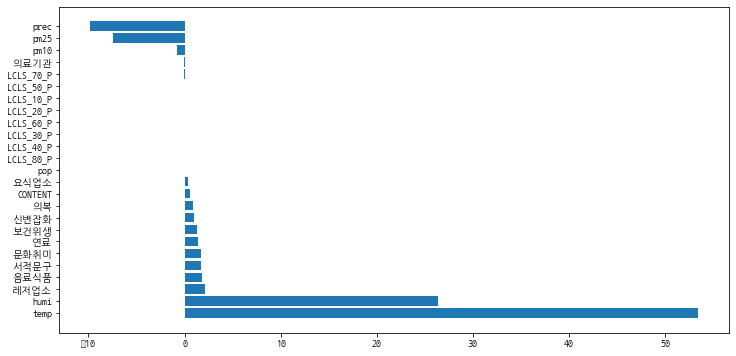

In [74]:
coef_bar('유통업')

## 의복 42

In [75]:
anova('의복')

(                 df        sum_sq        mean_sq          F        PR(>F)
 pm10            1.0  1.094309e+05  109430.934457  14.989187  1.286962e-04
 pm25            1.0  2.605920e+04   26059.199239   3.569431  5.966719e-02
 temp            1.0  2.680508e+05  268050.812425  36.715978  3.488575e-09
 humi            1.0  1.197302e+05  119730.192215  16.399917  6.301209e-05
 CONTENT         1.0  6.174768e+04   61747.684813   8.457824  3.863456e-03
 prec            1.0  9.870207e+04   98702.066989  13.519612  2.725925e-04
 CONTENT:temp    1.0  1.752446e+05  175244.600736  24.003945  1.463988e-06
 CONTENT:prec    1.0  9.247273e+02     924.727303   0.126664  7.221282e-01
 CONTENT:humi    1.0  2.358745e+04   23587.449726   3.230866  7.311217e-02
 Residual      355.0  2.591734e+06    7300.658423        NaN           NaN,
 <class 'statsmodels.iolib.summary.Summary'>
 """
                             OLS Regression Results                            
 Dep. Variable:                     의복   R-s

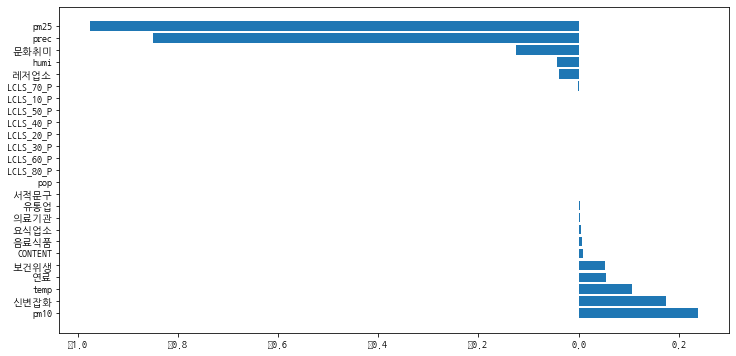

In [76]:
coef_bar('의복')

## 직물 43 Null로 삭제

## 신변잡화 44

In [77]:
anova('신변잡화')

(                 df         sum_sq      mean_sq         F    PR(>F)
 pm10            1.0    1247.072034  1247.072034  1.555903  0.213088
 pm25            1.0     286.567673   286.567673  0.357535  0.550260
 temp            1.0    3354.219047  3354.219047  4.184874  0.041523
 humi            1.0    7929.996594  7929.996594  9.893820  0.001798
 CONTENT         1.0      96.051821    96.051821  0.119839  0.729415
 prec            1.0    1158.000786  1158.000786  1.444774  0.230170
 CONTENT:temp    1.0     186.893917   186.893917  0.233177  0.629476
 CONTENT:prec    1.0     252.043392   252.043392  0.314461  0.575310
 CONTENT:humi    1.0      92.236728    92.236728  0.115079  0.734635
 Residual      355.0  284536.085132   801.510099       NaN       NaN,
 <class 'statsmodels.iolib.summary.Summary'>
 """
                             OLS Regression Results                            
 Dep. Variable:                   신변잡화   R-squared:                       0.049
 Model:                       

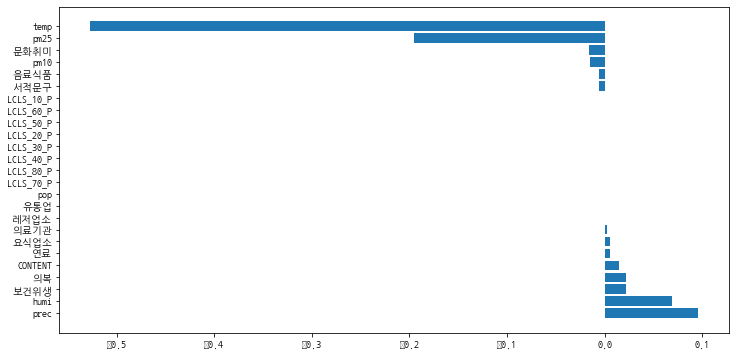

In [78]:
coef_bar('신변잡화')

## 서적문구 50

In [79]:
anova('서적문구')

(                 df        sum_sq       mean_sq          F        PR(>F)
 pm10            1.0  2.586053e+06  2.586053e+06  48.195385  1.843976e-11
 pm25            1.0  8.084855e+04  8.084855e+04   1.506747  2.204495e-01
 temp            1.0  7.339581e+05  7.339581e+05  13.678525  2.512557e-04
 humi            1.0  2.198652e+04  2.198652e+04   0.409755  5.225067e-01
 CONTENT         1.0  1.117378e+04  1.117378e+04   0.208242  6.484279e-01
 prec            1.0  1.931003e+04  1.931003e+04   0.359874  5.489587e-01
 CONTENT:temp    1.0  3.079377e+04  3.079377e+04   0.573893  4.492187e-01
 CONTENT:prec    1.0  5.092843e+04  5.092843e+04   0.949136  3.306027e-01
 CONTENT:humi    1.0  1.045723e+04  1.045723e+04   0.194888  6.591481e-01
 Residual      355.0  1.904848e+07  5.365769e+04        NaN           NaN,
 <class 'statsmodels.iolib.summary.Summary'>
 """
                             OLS Regression Results                            
 Dep. Variable:                   서적문구   R-squared:    

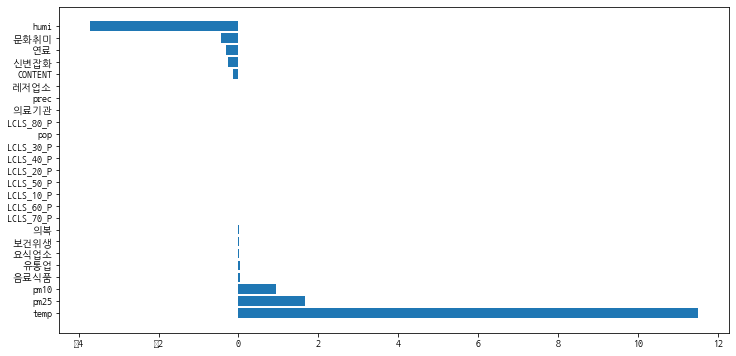

In [80]:
coef_bar('서적문구')

## 자동차판매 60 Null로 삭제

## 자동차정비 62 Null로 삭제

## 의료기관 70

In [81]:
anova('의료기관')

(                 df        sum_sq       mean_sq          F        PR(>F)
 pm10            1.0  3.578007e+07  3.578007e+07   6.045630  1.441738e-02
 pm25            1.0  4.509422e+06  4.509422e+06   0.761941  3.833118e-01
 temp            1.0  5.268246e+06  5.268246e+06   0.890157  3.460765e-01
 humi            1.0  8.655908e+06  8.655908e+06   1.462558  2.273284e-01
 CONTENT         1.0  3.744714e+08  3.744714e+08  63.273083  2.434784e-14
 prec            1.0  2.196364e+06  2.196364e+06   0.371112  5.427885e-01
 CONTENT:temp    1.0  3.942247e+07  3.942247e+07   6.661073  1.025487e-02
 CONTENT:prec    1.0  2.388812e+06  2.388812e+06   0.403629  5.256303e-01
 CONTENT:humi    1.0  2.300222e+06  2.300222e+06   0.388660  5.334048e-01
 Residual      355.0  2.101009e+09  5.918336e+06        NaN           NaN,
 <class 'statsmodels.iolib.summary.Summary'>
 """
                             OLS Regression Results                            
 Dep. Variable:                   의료기관   R-squared:    

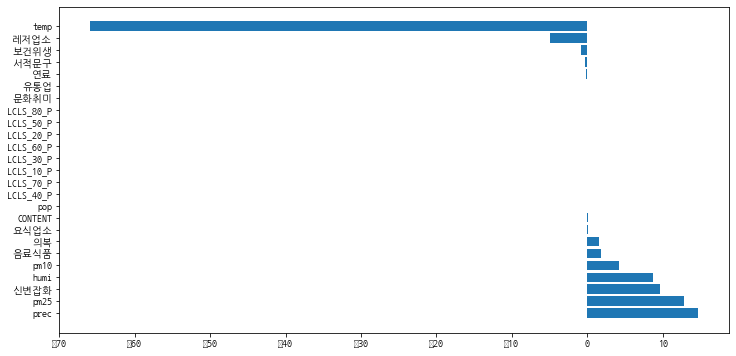

In [82]:
coef_bar('의료기관')

## 보건위생 71

In [83]:
anova('보건위생')

(                 df        sum_sq       mean_sq          F        PR(>F)
 pm10            1.0  1.127741e+06  1.127741e+06  17.025403  4.599481e-05
 pm25            1.0  4.934409e+05  4.934409e+05   7.449433  6.661702e-03
 temp            1.0  1.501211e+06  1.501211e+06  22.663652  2.814791e-06
 humi            1.0  1.062755e+06  1.062755e+06  16.044320  7.539818e-05
 CONTENT         1.0  6.455217e+06  6.455217e+06  97.453835  1.805853e-20
 prec            1.0  1.528044e+05  1.528044e+05   2.306875  1.296929e-01
 CONTENT:temp    1.0  7.206464e+04  7.206464e+04   1.087953  2.976349e-01
 CONTENT:prec    1.0  2.040081e+04  2.040081e+04   0.307989  5.792662e-01
 CONTENT:humi    1.0  6.656618e+05  6.656618e+05  10.049436  1.656466e-03
 Residual      355.0  2.351474e+07  6.623872e+04        NaN           NaN,
 <class 'statsmodels.iolib.summary.Summary'>
 """
                             OLS Regression Results                            
 Dep. Variable:                   보건위생   R-squared:    

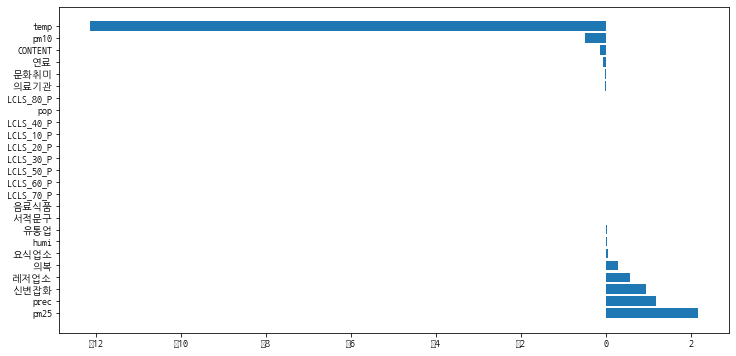

In [84]:
coef_bar('보건위생')

## 요식업소 80

In [85]:
anova('요식업소')

(                 df        sum_sq       mean_sq          F        PR(>F)
 pm10            1.0  1.445647e+05  1.445647e+05   0.095295  7.577311e-01
 pm25            1.0  4.924830e+05  4.924830e+05   0.324639  5.691931e-01
 temp            1.0  1.872724e+07  1.872724e+07  12.344796  4.993808e-04
 humi            1.0  3.932759e+07  3.932759e+07  25.924322  5.773514e-07
 CONTENT         1.0  2.063171e+07  2.063171e+07  13.600203  2.615515e-04
 prec            1.0  1.617839e+07  1.617839e+07  10.664618  1.198397e-03
 CONTENT:temp    1.0  8.755847e+06  8.755847e+06   5.771760  1.679859e-02
 CONTENT:prec    1.0  6.618931e+04  6.618931e+04   0.043631  8.346609e-01
 CONTENT:humi    1.0  2.812414e+06  2.812414e+06   1.853913  1.741925e-01
 Residual      355.0  5.385404e+08  1.517015e+06        NaN           NaN,
 <class 'statsmodels.iolib.summary.Summary'>
 """
                             OLS Regression Results                            
 Dep. Variable:                   요식업소   R-squared:    

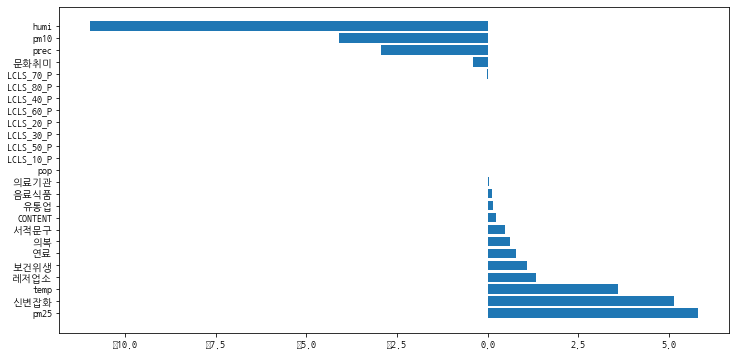

In [86]:
coef_bar('요식업소')

## 음료식품 81

In [87]:
anova('음료식품')

(                 df        sum_sq       mean_sq          F    PR(>F)
 pm10            1.0  1.106106e+06  1.106106e+06   5.463253  0.019976
 pm25            1.0  8.906322e+04  8.906322e+04   0.439899  0.507602
 temp            1.0  2.718623e+06  2.718623e+06  13.427766  0.000286
 humi            1.0  1.107649e+05  1.107649e+05   0.547087  0.459999
 CONTENT         1.0  9.628334e+05  9.628334e+05   4.755606  0.029859
 prec            1.0  1.227342e+05  1.227342e+05   0.606206  0.436739
 CONTENT:temp    1.0  3.559336e+05  3.559336e+05   1.758020  0.185724
 CONTENT:prec    1.0  2.547206e+05  2.547206e+05   1.258111  0.262767
 CONTENT:humi    1.0  1.317029e+06  1.317029e+06   6.505043  0.011176
 Residual      355.0  7.187431e+07  2.024628e+05        NaN       NaN,
 <class 'statsmodels.iolib.summary.Summary'>
 """
                             OLS Regression Results                            
 Dep. Variable:                   음료식품   R-squared:                       0.089
 Model:            

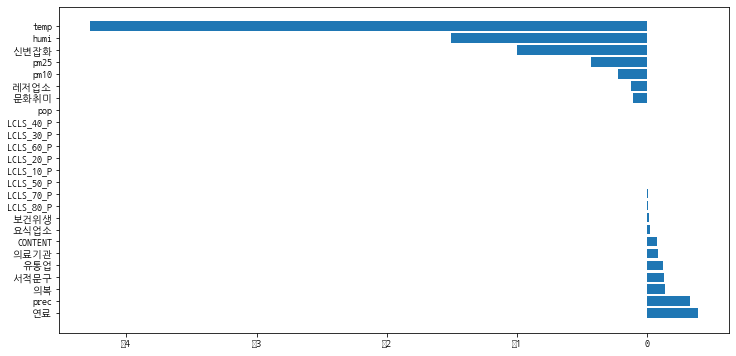

In [88]:
coef_bar('음료식품')

## 수리서비스 92

In [89]:
# anova('수리서비스')

In [90]:
# coef_bar('수리서비스')

* age50
* 유통업(10) - temp humi
* 의복(10) - pm10 신변잡화 temp
* 서적문구(pm10)- temp pm25 pm10
* 의료기관(pm10) - prec dpm25 신변잡화 humi pm10
* 보건위생 - pm25 prec
* 음료식품(pm10) - 연료 prec 의복 ... (pm25 pm10 음의회귀)



In [91]:
anova('LCLS_10_P')

(                 df        sum_sq       mean_sq          F        PR(>F)
 pm10            1.0  7.635486e+12  7.635486e+12  27.060065  3.340985e-07
 pm25            1.0  5.556909e+11  5.556909e+11   1.969361  1.613897e-01
 temp            1.0  2.926500e+12  2.926500e+12  10.371479  1.397942e-03
 humi            1.0  3.378672e+11  3.378672e+11   1.197397  2.745845e-01
 CONTENT         1.0  2.471916e+12  2.471916e+12   8.760439  3.285119e-03
 prec            1.0  2.447860e+12  2.447860e+12   8.675182  3.438482e-03
 CONTENT:temp    1.0  3.264340e+12  3.264340e+12  11.568777  7.470851e-04
 CONTENT:prec    1.0  7.407664e+08  7.407664e+08   0.002625  9.591652e-01
 CONTENT:humi    1.0  3.376241e+06  3.376241e+06   0.000012  9.972420e-01
 Residual      355.0  1.001697e+14  2.821681e+11        NaN           NaN,
 <class 'statsmodels.iolib.summary.Summary'>
 """
                             OLS Regression Results                            
 Dep. Variable:              LCLS_10_P   R-squared:    

In [92]:
anova('LCLS_10_P')

(                 df        sum_sq       mean_sq          F        PR(>F)
 pm10            1.0  7.635486e+12  7.635486e+12  27.060065  3.340985e-07
 pm25            1.0  5.556909e+11  5.556909e+11   1.969361  1.613897e-01
 temp            1.0  2.926500e+12  2.926500e+12  10.371479  1.397942e-03
 humi            1.0  3.378672e+11  3.378672e+11   1.197397  2.745845e-01
 CONTENT         1.0  2.471916e+12  2.471916e+12   8.760439  3.285119e-03
 prec            1.0  2.447860e+12  2.447860e+12   8.675182  3.438482e-03
 CONTENT:temp    1.0  3.264340e+12  3.264340e+12  11.568777  7.470851e-04
 CONTENT:prec    1.0  7.407664e+08  7.407664e+08   0.002625  9.591652e-01
 CONTENT:humi    1.0  3.376241e+06  3.376241e+06   0.000012  9.972420e-01
 Residual      355.0  1.001697e+14  2.821681e+11        NaN           NaN,
 <class 'statsmodels.iolib.summary.Summary'>
 """
                             OLS Regression Results                            
 Dep. Variable:              LCLS_10_P   R-squared:    

In [93]:
anova('LCLS_20_P')

(                 df        sum_sq       mean_sq         F    PR(>F)
 pm10            1.0  1.045265e+13  1.045265e+13  9.037741  0.002833
 pm25            1.0  1.403743e+12  1.403743e+12  1.213728  0.271341
 temp            1.0  2.422868e+12  2.422868e+12  2.094900  0.148674
 humi            1.0  3.050764e+12  3.050764e+12  2.637802  0.105235
 CONTENT         1.0  7.059592e+12  7.059592e+12  6.103982  0.013957
 prec            1.0  1.951432e+11  1.951432e+11  0.168728  0.681493
 CONTENT:temp    1.0  2.970333e+12  2.970333e+12  2.568259  0.109917
 CONTENT:prec    1.0  3.545182e+09  3.545182e+09  0.003065  0.955879
 CONTENT:humi    1.0  5.143452e+12  5.143452e+12  4.447217  0.035658
 Residual      355.0  4.105771e+14  1.156555e+12       NaN       NaN,
 <class 'statsmodels.iolib.summary.Summary'>
 """
                             OLS Regression Results                            
 Dep. Variable:              LCLS_20_P   R-squared:                       0.074
 Model:                       

In [94]:
anova('LCLS_30_P')

(                 df        sum_sq       mean_sq            F         PR(>F)
 pm10            1.0  7.334144e+13  7.334144e+13   373.780950   2.113125e-57
 pm25            1.0  3.562697e+12  3.562697e+12    18.157104   2.609216e-05
 temp            1.0  3.559249e+14  3.559249e+14  1813.953529  1.400258e-141
 humi            1.0  5.271573e+13  5.271573e+13   268.663077   2.342610e-45
 CONTENT         1.0  2.836461e+13  2.836461e+13   144.558816   3.624593e-28
 prec            1.0  2.141294e+13  2.141294e+13   109.129993   1.879290e-22
 CONTENT:temp    1.0  4.137616e+12  4.137616e+12    21.087154   6.102068e-06
 CONTENT:prec    1.0  5.782013e+11  5.782013e+11     2.946774   8.692147e-02
 CONTENT:humi    1.0  1.497782e+11  1.497782e+11     0.763337   3.828768e-01
 Residual      355.0  6.965633e+13  1.962150e+11          NaN            NaN,
 <class 'statsmodels.iolib.summary.Summary'>
 """
                             OLS Regression Results                            
 Dep. Variable:       

In [95]:
anova('LCLS_40_P')

(                 df        sum_sq       mean_sq         F    PR(>F)
 pm10            1.0  7.032760e+09  7.032760e+09  0.913819  0.339754
 pm25            1.0  9.514702e+08  9.514702e+08  0.123632  0.725337
 temp            1.0  1.388821e+09  1.388821e+09  0.180460  0.671236
 humi            1.0  1.678508e+10  1.678508e+10  2.181011  0.140609
 CONTENT         1.0  2.753759e+10  2.753759e+10  3.578165  0.059358
 prec            1.0  5.552934e+09  5.552934e+09  0.721534  0.396214
 CONTENT:temp    1.0  4.565140e+09  4.565140e+09  0.593183  0.441703
 CONTENT:prec    1.0  5.491100e+08  5.491100e+08  0.071350  0.789536
 CONTENT:humi    1.0  5.835845e+09  5.835845e+09  0.758295  0.384451
 Residual      355.0  2.732083e+12  7.696009e+09       NaN       NaN,
 <class 'statsmodels.iolib.summary.Summary'>
 """
                             OLS Regression Results                            
 Dep. Variable:              LCLS_40_P   R-squared:                       0.025
 Model:                       

In [96]:
anova('LCLS_50_P')

(                 df        sum_sq       mean_sq           F        PR(>F)
 pm10            1.0  2.862858e+10  2.862858e+10    0.697445  4.042051e-01
 pm25            1.0  9.656730e+10  9.656730e+10    2.352559  1.259682e-01
 temp            1.0  8.312111e+08  8.312111e+08    0.020250  8.869222e-01
 humi            1.0  4.465780e+12  4.465780e+12  108.794701  2.138958e-22
 CONTENT         1.0  1.143793e+12  1.143793e+12   27.864914  2.270598e-07
 prec            1.0  1.331059e+12  1.331059e+12   32.427068  2.597446e-08
 CONTENT:temp    1.0  7.635898e+10  7.635898e+10    1.860247  1.734605e-01
 CONTENT:prec    1.0  3.283721e+10  3.283721e+10    0.799976  3.717067e-01
 CONTENT:humi    1.0  2.485197e+10  2.485197e+10    0.605440  4.370282e-01
 Residual      355.0  1.457196e+13  4.104777e+10         NaN           NaN,
 <class 'statsmodels.iolib.summary.Summary'>
 """
                             OLS Regression Results                            
 Dep. Variable:              LCLS_50_P   R-s

In [97]:
anova('LCLS_60_P')

(                 df        sum_sq       mean_sq         F    PR(>F)
 pm10            1.0  2.759580e+10  2.759580e+10  4.094666  0.043768
 pm25            1.0  1.569013e+07  1.569013e+07  0.002328  0.961544
 temp            1.0  6.985734e+08  6.985734e+08  0.103654  0.747677
 humi            1.0  5.028553e+09  5.028553e+09  0.746137  0.388285
 CONTENT         1.0  3.745475e+08  3.745475e+08  0.055575  0.813767
 prec            1.0  1.866922e+09  1.866922e+09  0.277014  0.598994
 CONTENT:temp    1.0  8.760469e+09  8.760469e+09  1.299879  0.255004
 CONTENT:prec    1.0  4.430481e+09  4.430481e+09  0.657395  0.418024
 CONTENT:humi    1.0  3.046271e+09  3.046271e+09  0.452006  0.501821
 Residual      355.0  2.392505e+12  6.739450e+09       NaN       NaN,
 <class 'statsmodels.iolib.summary.Summary'>
 """
                             OLS Regression Results                            
 Dep. Variable:              LCLS_60_P   R-squared:                       0.021
 Model:                       

In [98]:
anova('LCLS_70_P')

(                 df        sum_sq       mean_sq          F    PR(>F)
 pm10            1.0  2.602662e+09  2.602662e+09   4.227623  0.040502
 pm25            1.0  1.936107e+08  1.936107e+08   0.314491  0.575291
 temp            1.0  7.304239e+09  7.304239e+09  11.864611  0.000641
 humi            1.0  1.108819e+10  1.108819e+10  18.011052  0.000028
 CONTENT         1.0  1.462165e+10  1.462165e+10  23.750611  0.000002
 prec            1.0  2.133437e+09  2.133437e+09   3.465440  0.063490
 CONTENT:temp    1.0  1.067619e+08  1.067619e+08   0.173418  0.677343
 CONTENT:prec    1.0  1.497045e+08  1.497045e+08   0.243172  0.622229
 CONTENT:humi    1.0  2.543220e+08  2.543220e+08   0.413107  0.520812
 Residual      355.0  2.185495e+11  6.156324e+08        NaN       NaN,
 <class 'statsmodels.iolib.summary.Summary'>
 """
                             OLS Regression Results                            
 Dep. Variable:              LCLS_70_P   R-squared:                       0.150
 Model:            

In [99]:
anova('LCLS_80_P')

(                 df        sum_sq       mean_sq          F        PR(>F)
 pm10            1.0  1.998761e+10  1.998761e+10  25.824850  6.057544e-07
 pm25            1.0  3.130564e+09  3.130564e+09   4.044822  4.506255e-02
 temp            1.0  6.027771e+10  6.027771e+10  77.881371  5.054311e-17
 humi            1.0  2.183384e+10  2.183384e+10  28.210252  1.924527e-07
 CONTENT         1.0  8.470094e+09  8.470094e+09  10.943723  1.035328e-03
 prec            1.0  6.575042e+09  6.575042e+09   8.495235  3.786658e-03
 CONTENT:temp    1.0  1.760845e+08  1.760845e+08   0.227509  6.336707e-01
 CONTENT:prec    1.0  2.294745e+07  2.294745e+07   0.029649  8.633870e-01
 CONTENT:humi    1.0  1.670700e+08  1.670700e+08   0.215862  6.424963e-01
 Residual      355.0  2.747587e+11  7.739682e+08        NaN           NaN,
 <class 'statsmodels.iolib.summary.Summary'>
 """
                             OLS Regression Results                            
 Dep. Variable:              LCLS_80_P   R-squared:    